In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('../data/220801.xlsx')
data = data.fillna(method='ffill')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Total Accuracy,Accuracy_OSA,Accuracy_insomnia,"Accuracy_PLMD,RLS",Accuracy_parasomnia,Accuracy_circadian,"Accuracy_Narcolepsy,EDS,Hypersomnia",...,"F1_PLMD,RLS",F1_parasomnia,F1_circadian,"F1_Narcolepsy,EDS,Hypersomnia",F1_Catathrenia,F1_control,F1_micro,F1_macro,F1_weighted,F1_samples
0,RandomForest,Data A,RAkELd,0.759379,0.912031,0.920440,0.906856,0.962484,0.981242,0.970246,...,0.506849,0.0,0.0,0.080000,0.000000,0.681004,0.810746,0.336960,0.770266,0.821022
1,RandomForest,Data A,MLSMOTE+RAkELd,0.765161,0.914839,0.921290,0.909032,0.962581,0.980000,0.972258,...,0.501767,0.0,0.0,0.085106,0.800000,0.647303,0.815505,0.431738,0.778999,0.828108
2,RandomForest,Data A,MLeNN+RAkELd,0.860000,0.974400,0.971200,0.930400,0.972800,0.993600,0.989600,...,0.519337,0.0,0.0,0.000000,0.000000,0.859259,0.913947,0.368210,0.886396,0.929867
3,RandomForest,Data B,RAkELd,0.747394,0.907419,0.917229,0.911711,0.955855,0.980380,0.971183,...,0.362832,0.0,0.0,0.113208,0.000000,0.563492,0.799885,0.306435,0.749495,0.812385
4,RandomForest,Data B,MLSMOTE+RAkELd,0.755963,0.923547,0.918043,0.900917,0.955963,0.979817,0.976147,...,0.301724,0.0,0.0,0.204082,0.705882,0.660000,0.806340,0.408558,0.757583,0.819062


In [3]:
data.rename(columns={'Unnamed: 0':'ML_Algorithm', 'Unnamed: 1':'data_type', 'Unnamed: 2': 'method'}, inplace=True)
data.head()

,ML_Algorithm,data_type,method,Total Accuracy,Accuracy_OSA,Accuracy_insomnia,"Accuracy_PLMD,RLS",Accuracy_parasomnia,Accuracy_circadian,"Accuracy_Narcolepsy,EDS,Hypersomnia",...,"F1_PLMD,RLS",F1_parasomnia,F1_circadian,"F1_Narcolepsy,EDS,Hypersomnia",F1_Catathrenia,F1_control,F1_micro,F1_macro,F1_weighted,F1_samples
0,RandomForest,Data A,RAkELd,0.759379,0.912031,0.920440,0.906856,0.962484,0.981242,0.970246,...,0.506849,0.0,0.0,0.080000,0.000000,0.681004,0.810746,0.336960,0.770266,0.821022
1,RandomForest,Data A,MLSMOTE+RAkELd,0.765161,0.914839,0.921290,0.909032,0.962581,0.980000,0.972258,...,0.501767,0.0,0.0,0.085106,0.800000,0.647303,0.815505,0.431738,0.778999,0.828108
2,RandomForest,Data A,MLeNN+RAkELd,0.860000,0.974400,0.971200,0.930400,0.972800,0.993600,0.989600,...,0.519337,0.0,0.0,0.000000,0.000000,0.859259,0.913947,0.368210,0.886396,0.929867
3,RandomForest,Data B,RAkELd,0.747394,0.907419,0.917229,0.911711,0.955855,0.980380,0.971183,...,0.362832,0.0,0.0,0.113208,0.000000,0.563492,0.799885,0.306435,0.749495,0.812385
4,RandomForest,Data B,MLSMOTE+RAkELd,0.755963,0.923547,0.918043,0.900917,0.955963,0.979817,0.976147,...,0.301724,0.0,0.0,0.204082,0.705882,0.660000,0.806340,0.408558,0.757583,0.819062


In [4]:
df = data.pivot(index='ML_Algorithm', columns=['data_type', 'method'], values='Total Accuracy')
df

data_type       Data A                                Data B                 \
method          RAkELd MLSMOTE+RAkELd MLeNN+RAkELd    RAkELd MLSMOTE+RAkELd   
ML_Algorithm                                                                  
LightGBM      0.558862       0.556774       0.6208  0.605150       0.662997   
RandomForest  0.759379       0.765161       0.8600  0.747394       0.755963   
XGBoost       0.757439       0.764516       0.8528  0.738811       0.749235   

data_type                  
method       MLeNN+RAkELd  
ML_Algorithm               
LightGBM         0.632764  
RandomForest     0.847050  
XGBoost          0.843168

In [15]:
data_columns = data.columns[3:].tolist()
cols_list = [data_columns[i:i+6] for i in range(0, len(data_columns), 6)]

In [44]:
cols_list

[['Total Accuracy',
  'Accuracy_OSA',
  'Accuracy_insomnia',
  'Accuracy_PLMD,RLS',
  'Accuracy_parasomnia',
  'Accuracy_circadian'],
 ['Accuracy_Narcolepsy,EDS,Hypersomnia',
  'Accuracy_Catathrenia',
  'Accuracy_control',
  'Precision_OSA',
  'Precision_insomnia',
  'Precision_PLMD,RLS'],
 ['Precision_parasomnia',
  'Precision_circadian',
  'Precision_Narcolepsy,EDS,Hypersomnia',
  'Precision_Catathrenia',
  'Precision_control',
  'Precision_micro'],
 ['Precision_macro',
  'Precision_weighted',
  'Precision_samples',
  'Recall_OSA',
  'Recall_insomnia',
  'Recall_PLMD,RLS'],
 ['Recall_parasomnia',
  'Recall_circadian',
  'Recall_Narcolepsy,EDS,Hypersomnia',
  'Recall_Catathrenia',
  'Recall_control',
  'Recall_micro'],
 ['Recall_macro',
  'Recall_weighted',
  'Recall_samples',
  'F1_OSA',
  'F1_insomnia',
  'F1_PLMD,RLS'],
 ['F1_parasomnia',
  'F1_circadian',
  'F1_Narcolepsy,EDS,Hypersomnia',
  'F1_Catathrenia',
  'F1_control',
  'F1_micro'],
 ['F1_macro', 'F1_weighted', 'F1_samples'

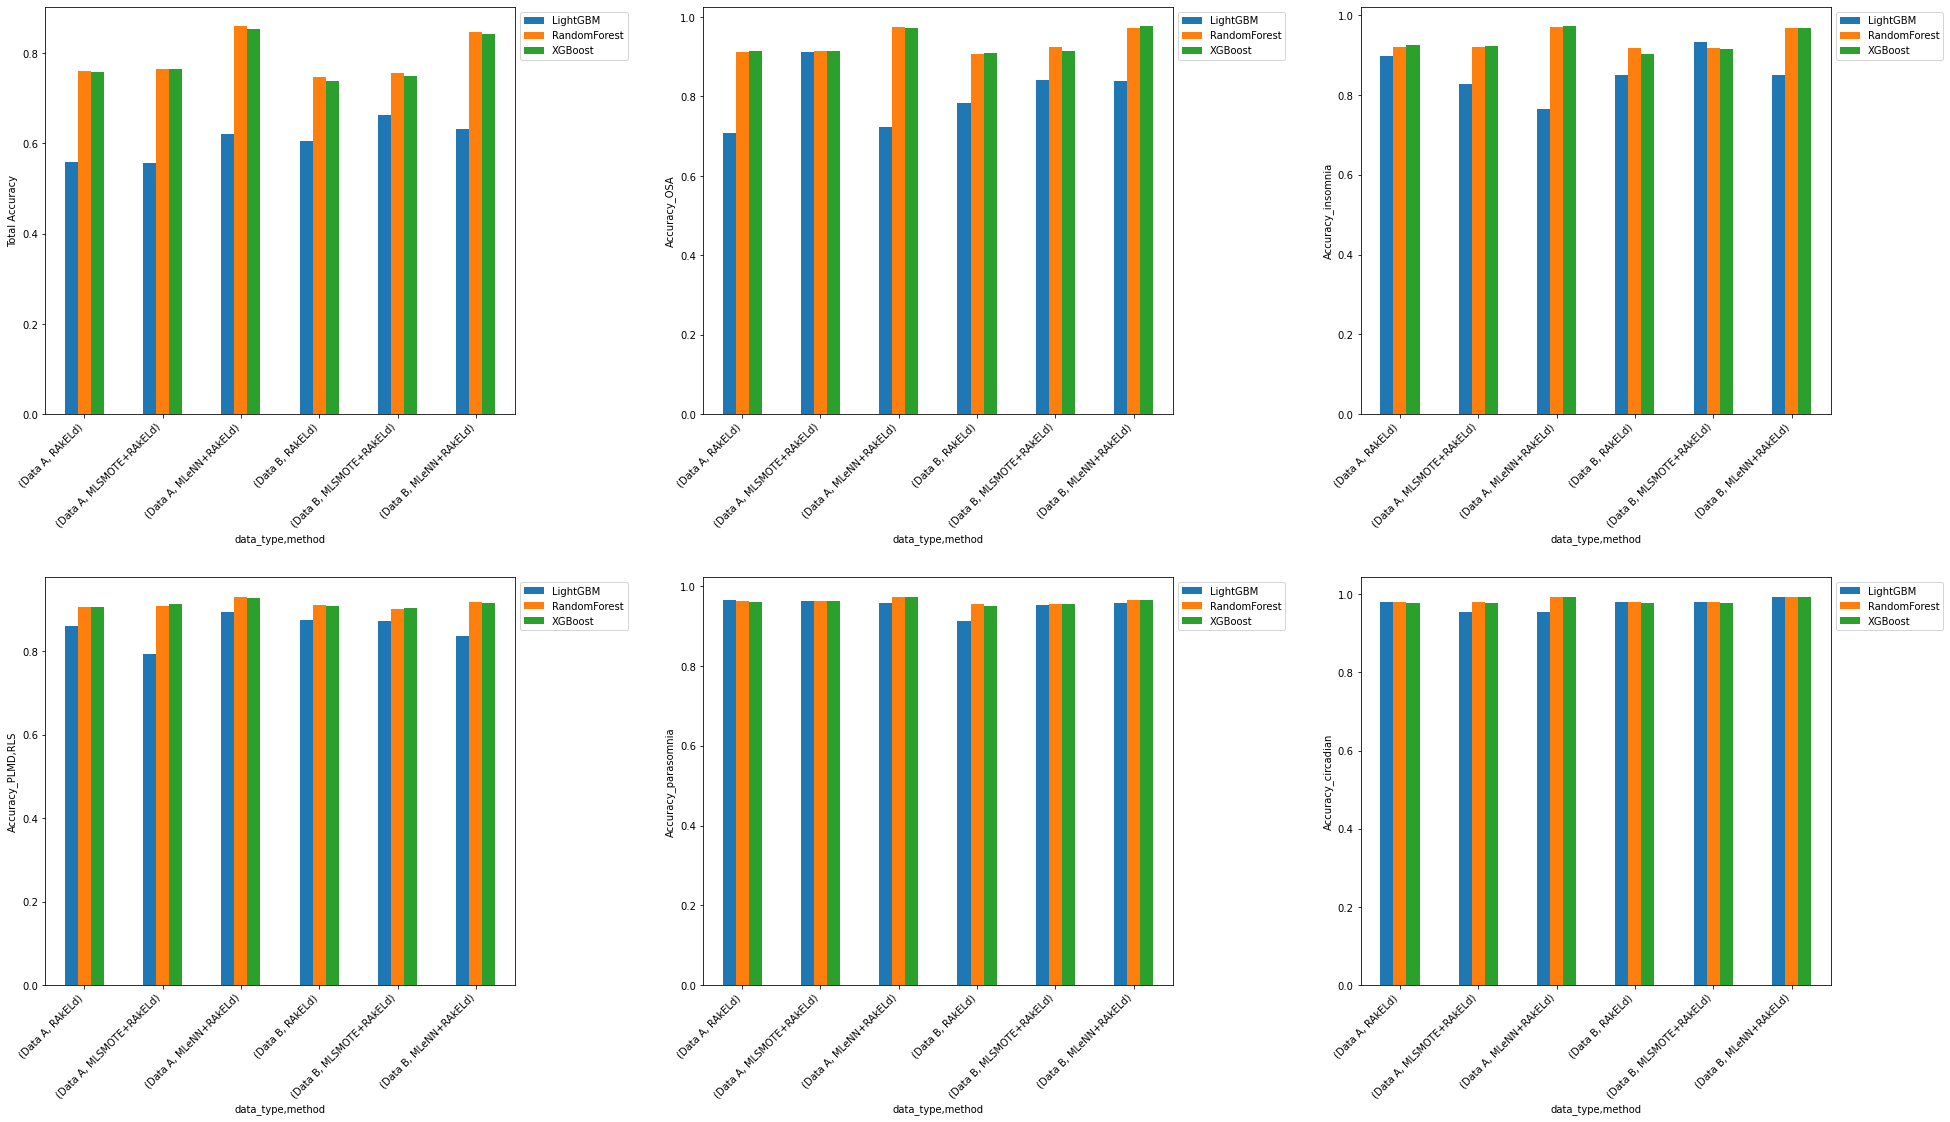

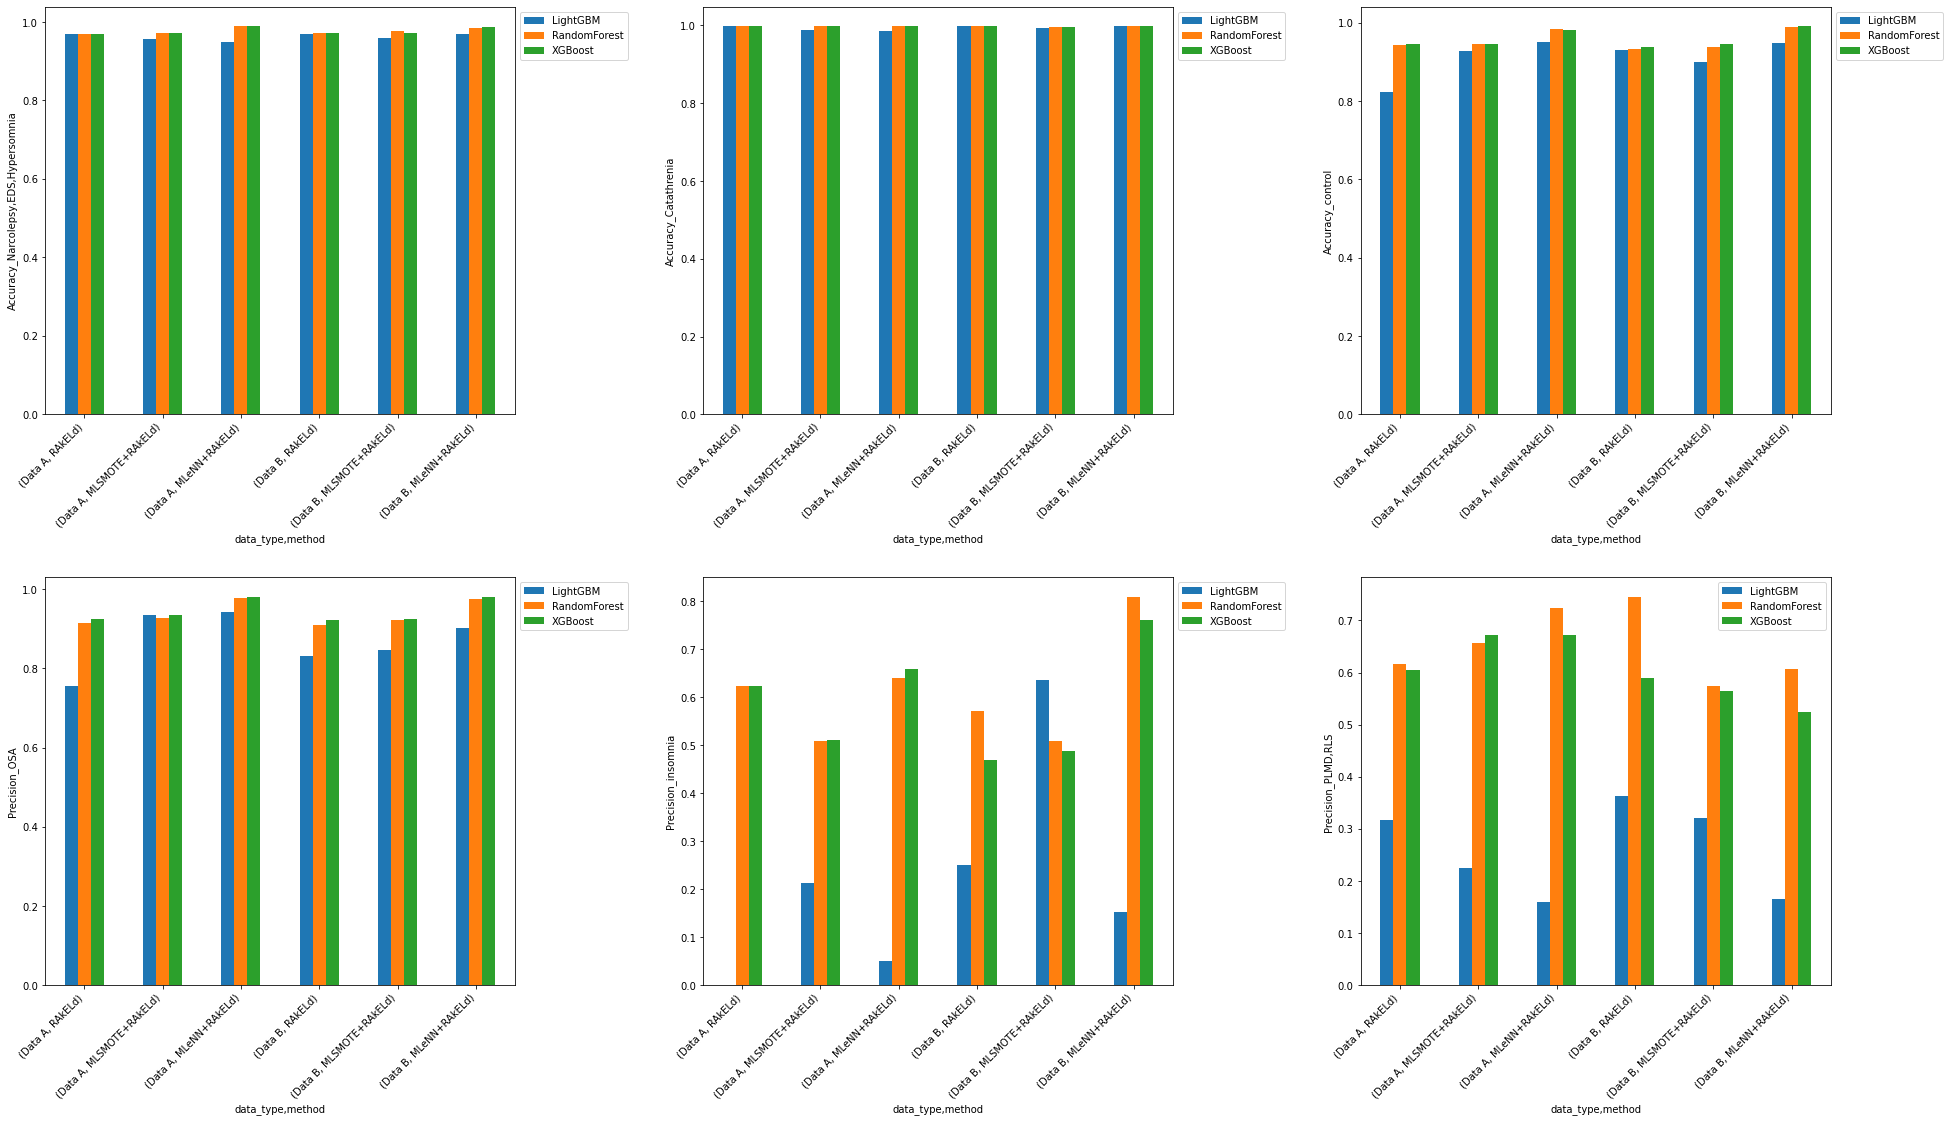

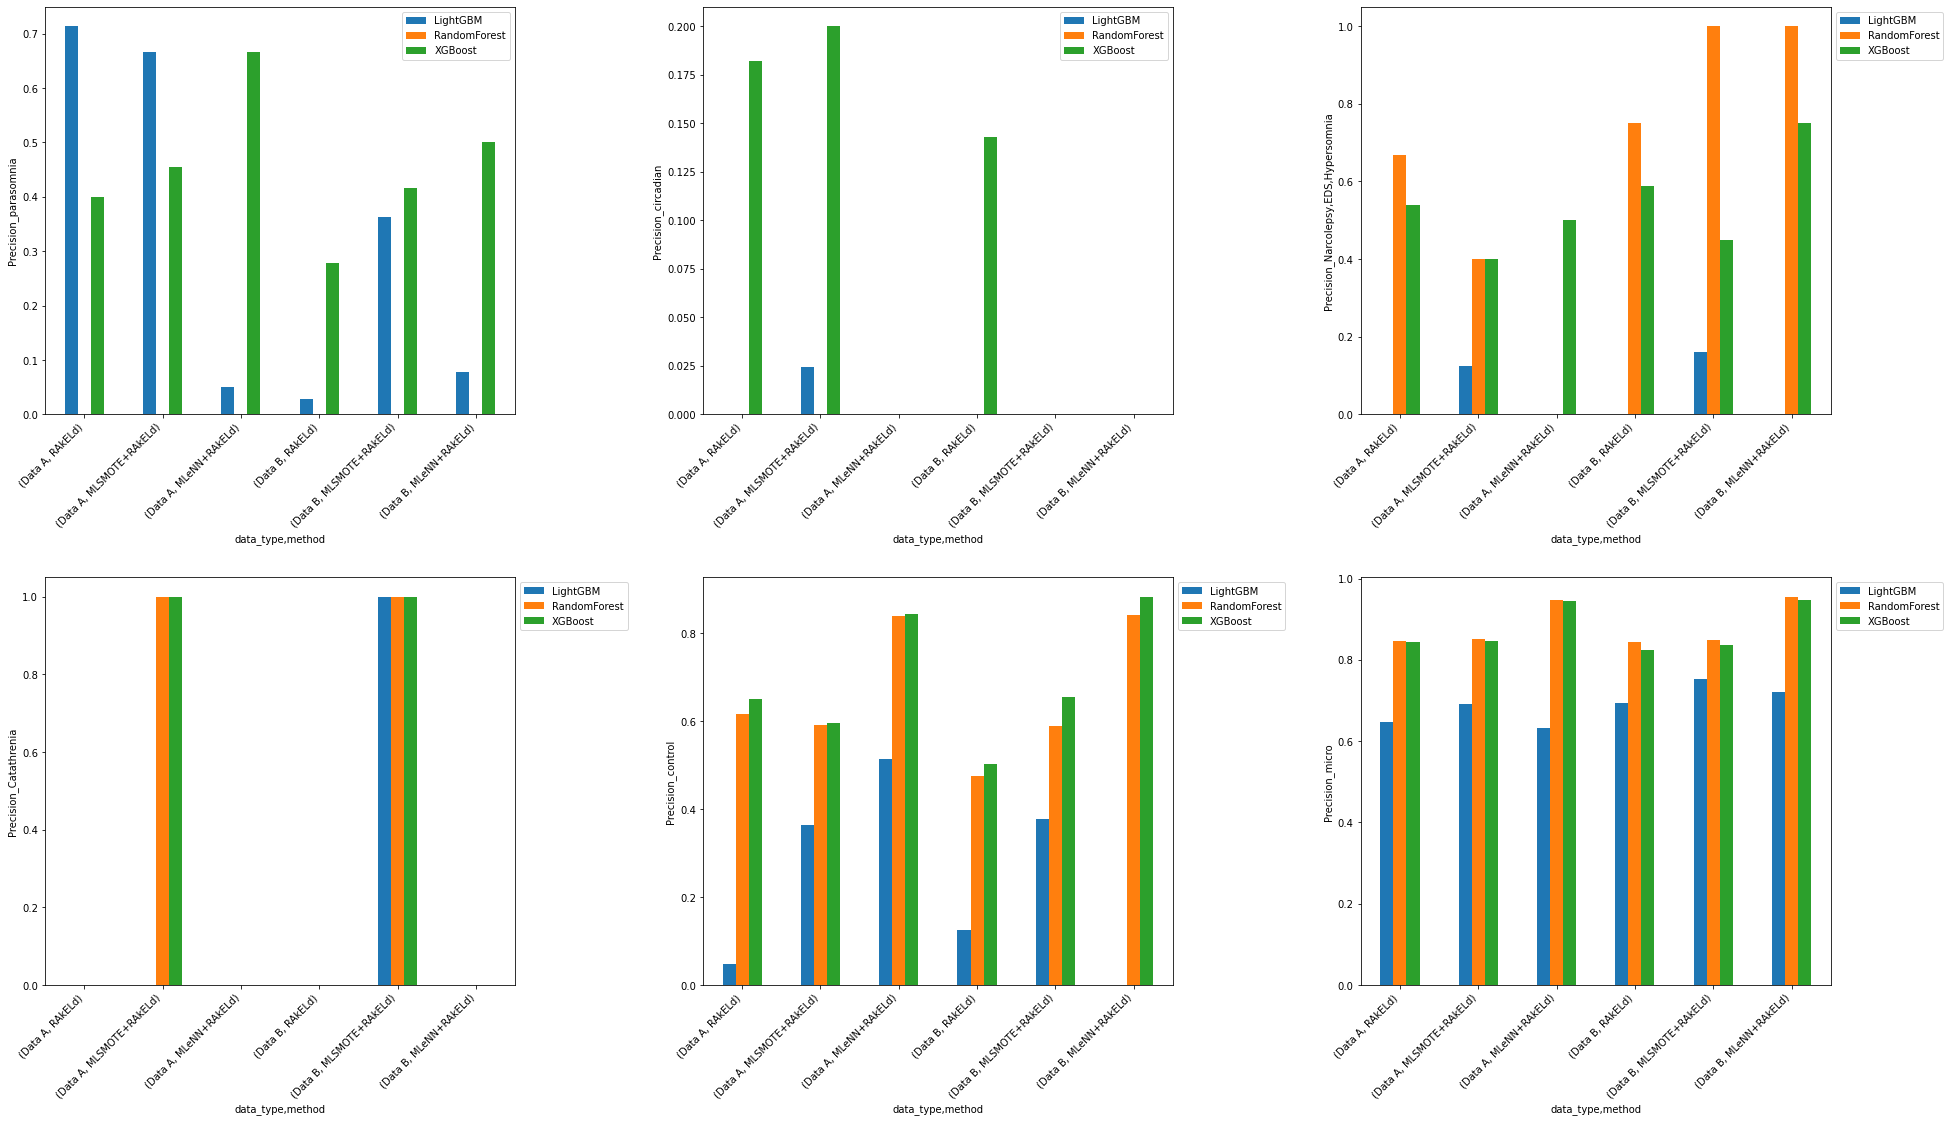

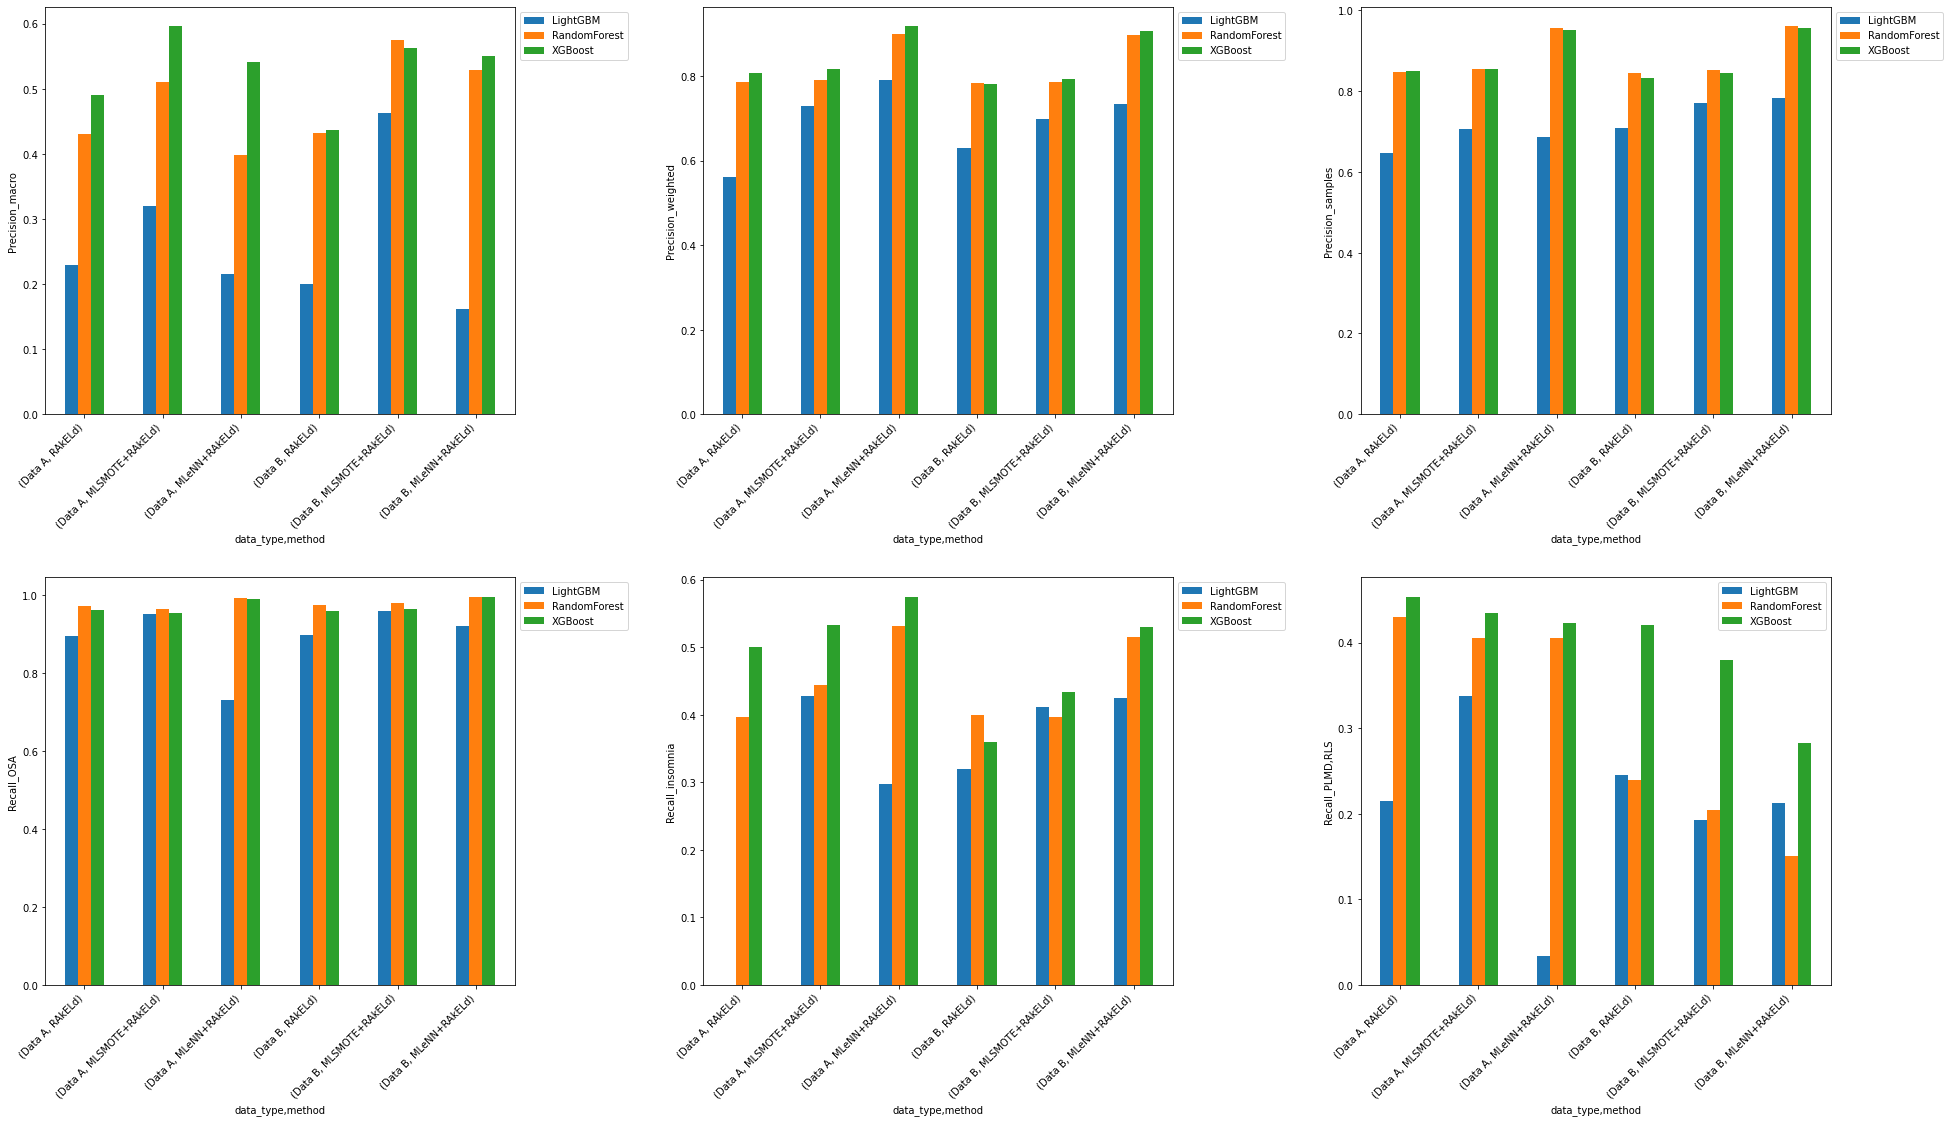

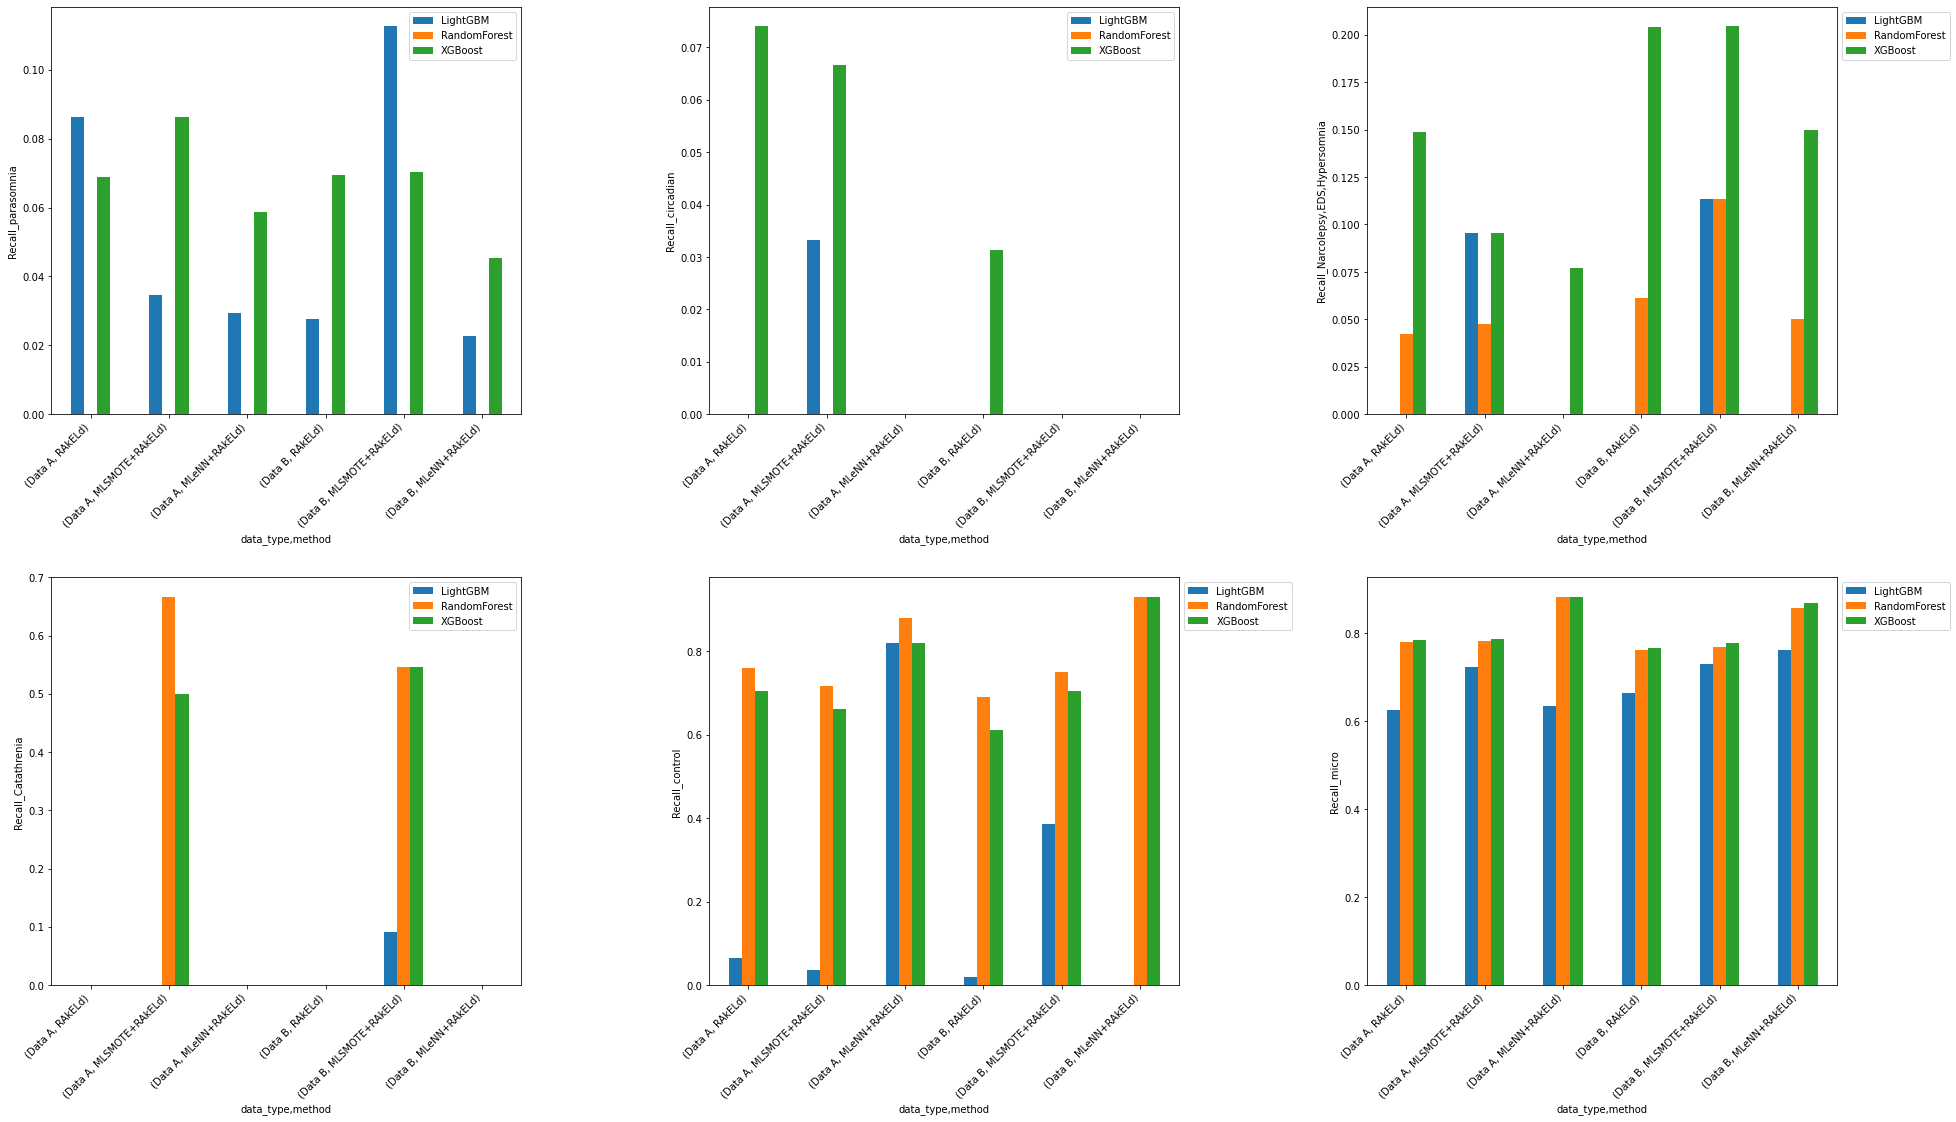

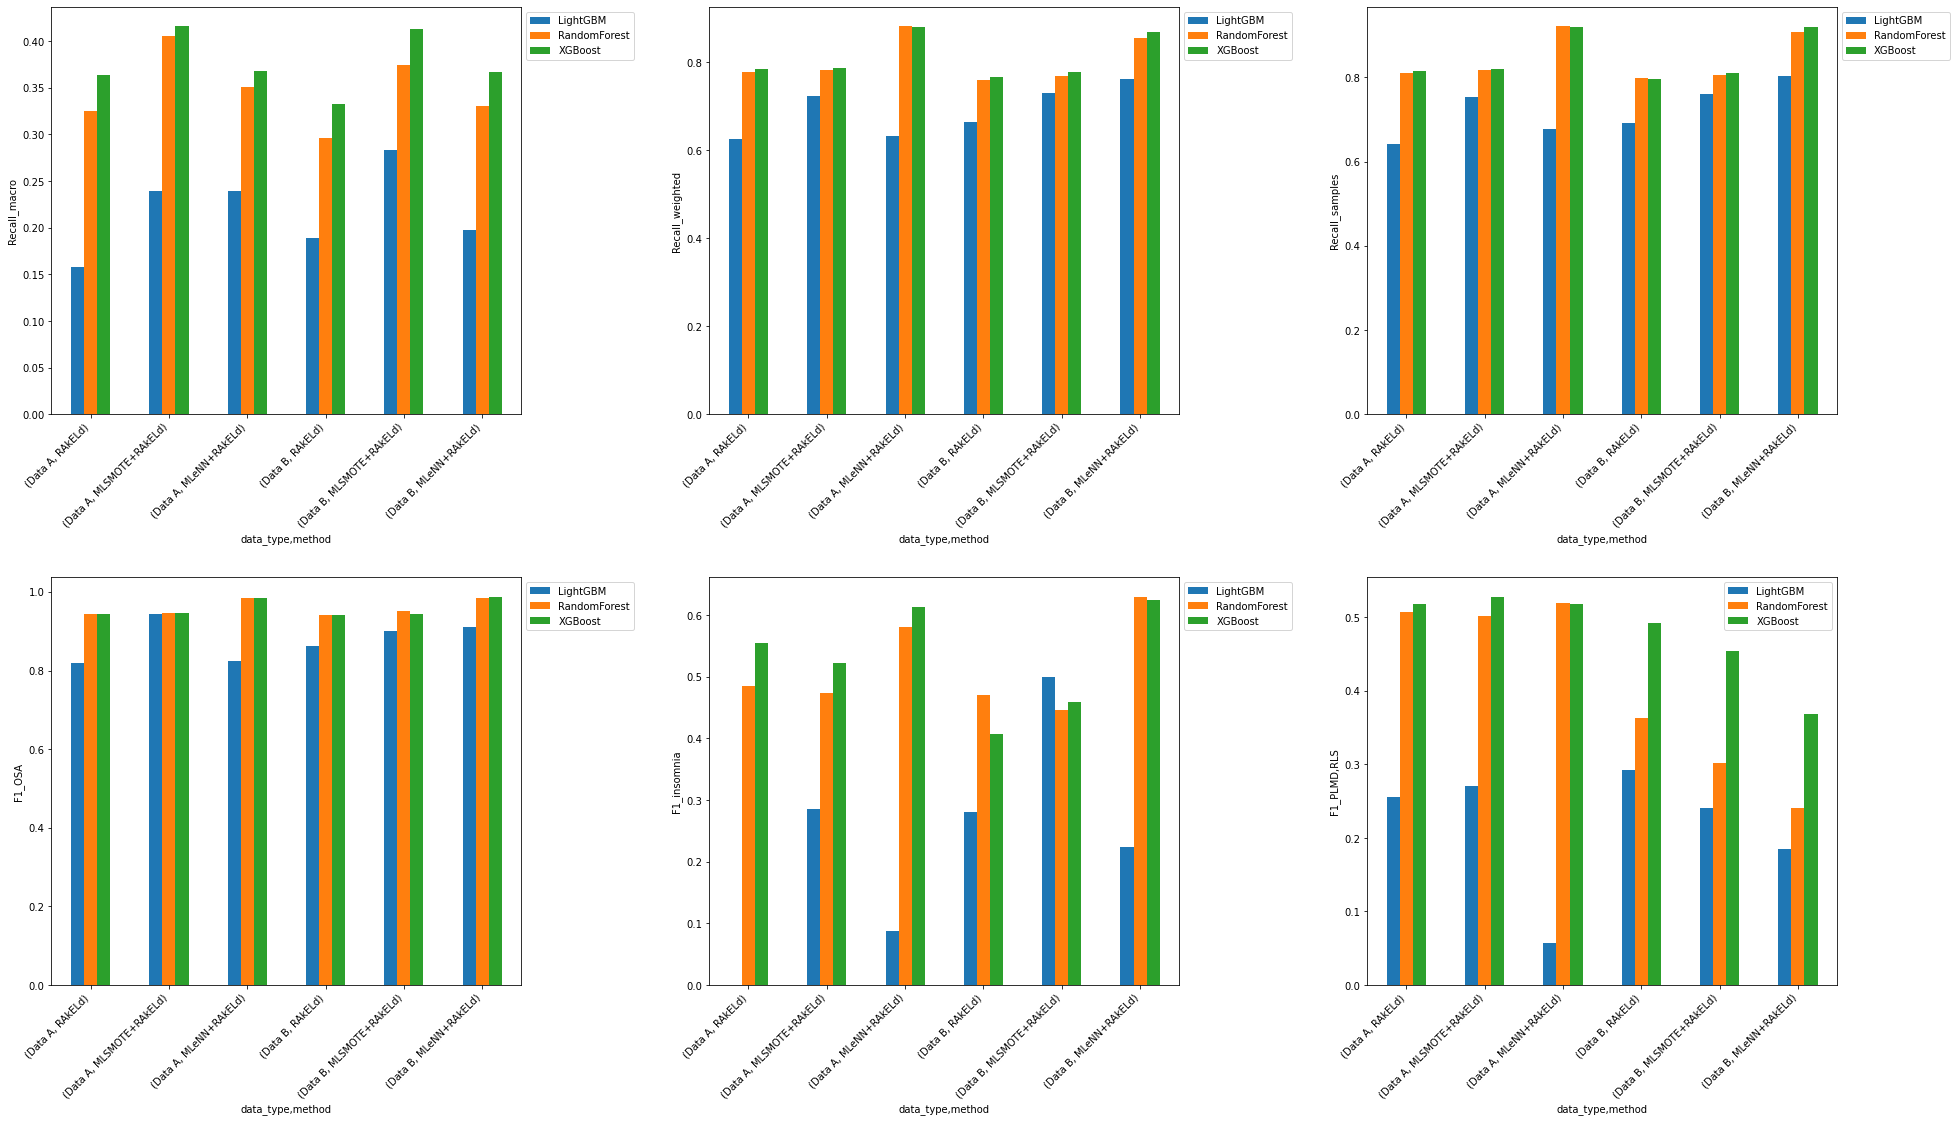

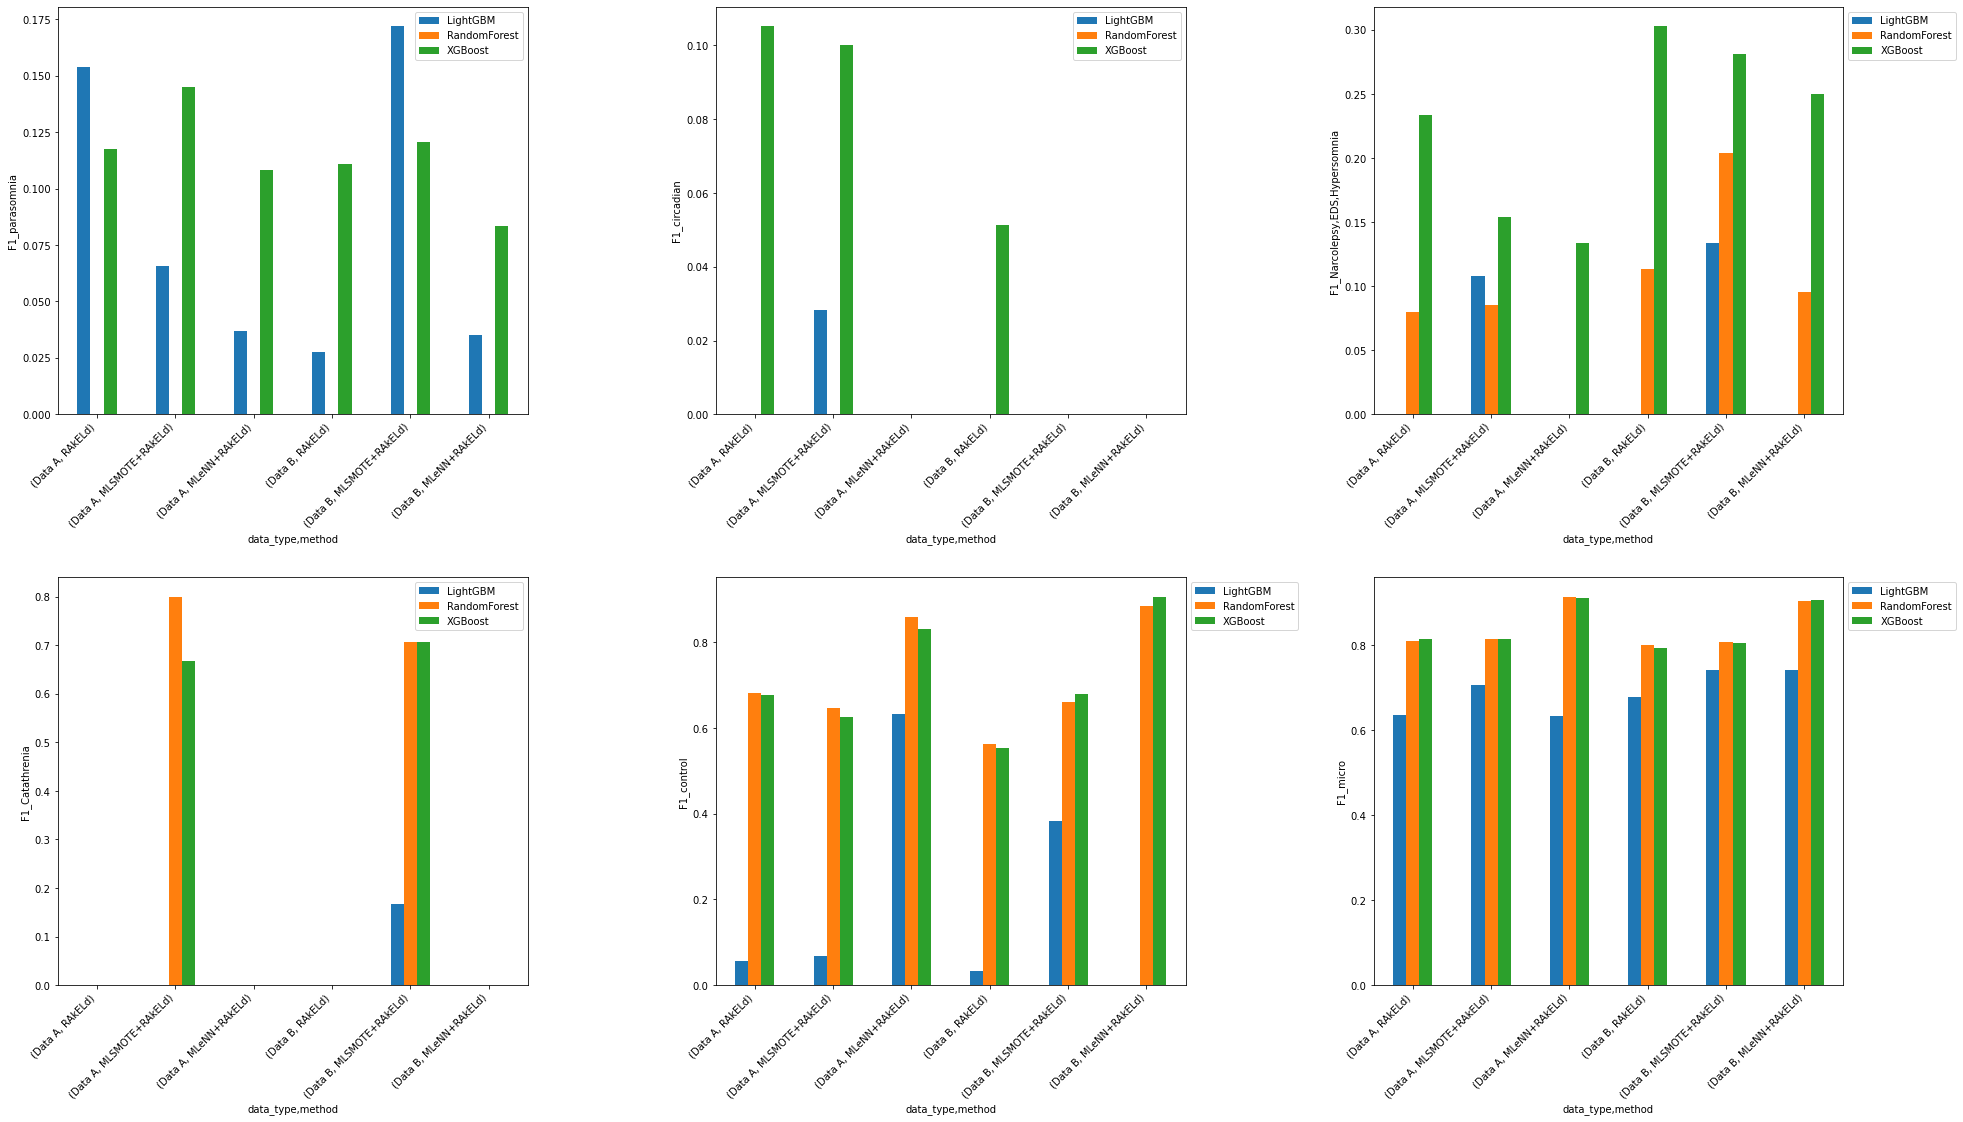

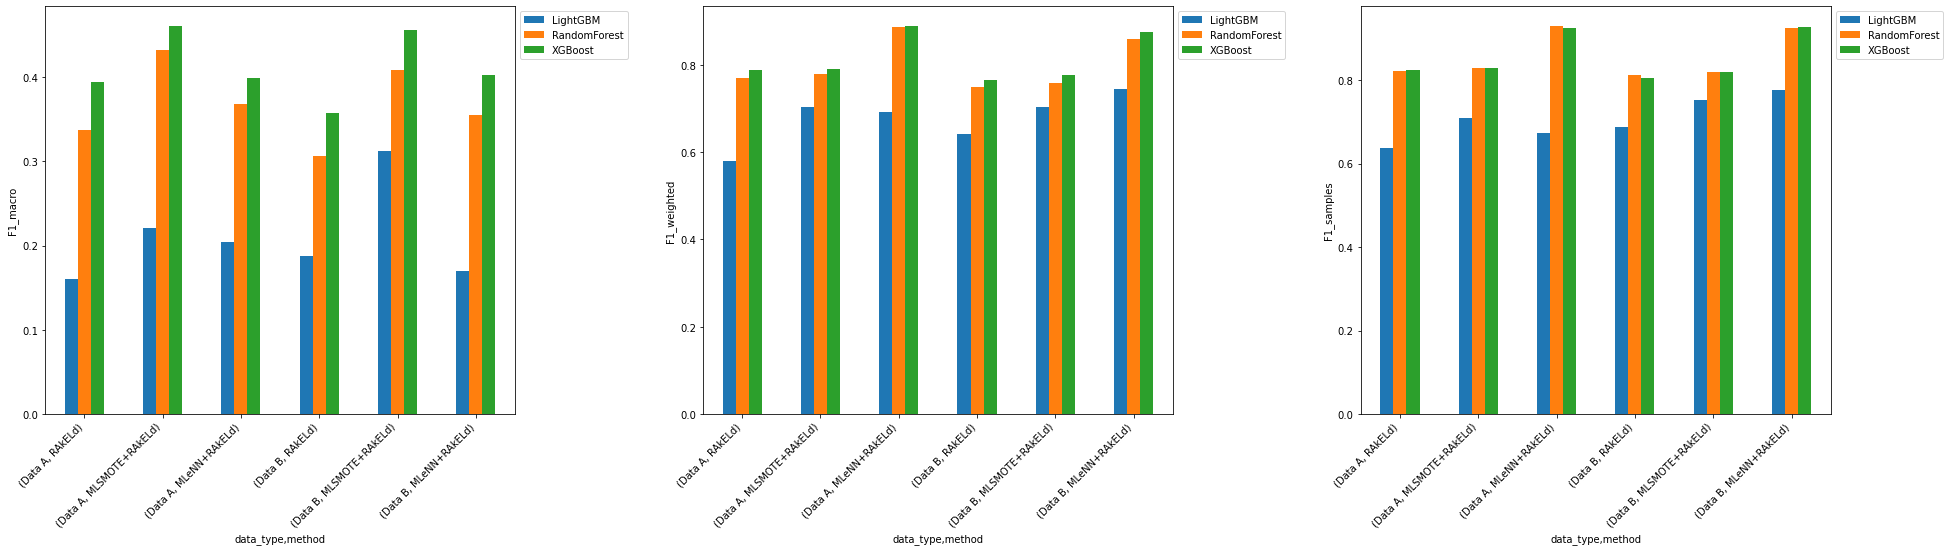

In [43]:
for cols in cols_list:
    plt.figure(figsize=(32, 18))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, col in enumerate(cols):
        df = data.pivot(index='ML_Algorithm', columns=['data_type', 'method'], values=col)
        ax = plt.subplot(2, 3, i+1)
        df.T.plot(kind='bar', ylabel=col, ax=ax)
        ax.legend(bbox_to_anchor=(1, 1))
        ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')